In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity

from findpeaks import findpeaks

from sklearn.cluster import DBSCAN

from pyriemann.clustering import Kmeans

In [2]:
data = pd.read_csv('tb2_data_clean_3.csv', sep=';')
data.head()

,MMSI,LAT,LON,TIMESTAMP
0,677054700,1.216667,103.618333,1621910431
1,677054700,1.216667,103.616667,1621909889
2,677054700,1.217755,103.618347,1621909243
3,677054700,1.217748,103.618327,1621908342
4,677028400,1.302933,103.616900,1621911351


In [3]:
data = data.iloc[:,1:3]
data

,LAT,LON
0,1.216667,103.618333
1,1.216667,103.616667
2,1.217755,103.618347
3,1.217748,103.618327
4,1.302933,103.616900
...,...,...
162200,1.305877,103.614833
162201,1.305882,103.614830
162202,2.202430,102.195437
162203,2.202423,102.195440


In [4]:
data.values

array([[  1.21666667, 103.6183333 ],
       [  1.21666667, 103.6166667 ],
       [  1.217755  , 103.6183467 ],
       ...,
       [  2.20243   , 102.1954367 ],
       [  2.20242333, 102.19544   ],
       [  2.20242667, 102.195435  ]])

In [8]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)

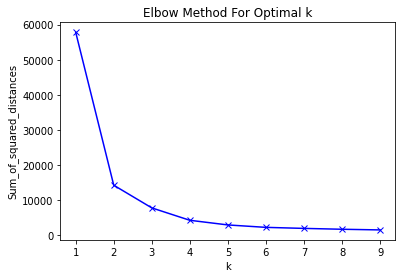

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
k_means = KMeans(n_clusters=2)
k_means.fit(data.values)
clusters = k_means.fit_predict(data.values)

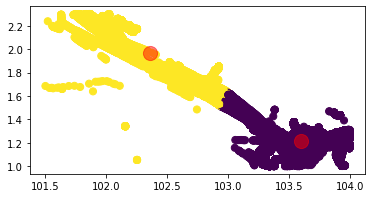

In [6]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [7]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return distances

distances = []
for i, (cx, cy) in enumerate(centers):
    print(i, cx, cy)
    mean_distance = k_mean_distance(data.values, cx, cy, i, clusters)
    distances.append(mean_distance)
    print(min(distances[i]))
    print(max(distances[i]))
    print('-----------------------------------')

0 1.2184297894613807 103.6006252405644
0.00044437559031325656
0.7294212666367474
-----------------------------------
1 1.9690680411206825 102.36198315341795
0.015778010513714913
0.9219628250488853
-----------------------------------


In [8]:
jarak = pd.DataFrame(distances[0])


# scaling data
mms = MinMaxScaler()
mms.fit(jarak)
print(mms.data_min_)
print(mms.data_max_)
jarak_scaled = mms.transform(jarak)
print(jarak_scaled.min())
print(jarak_scaled.max())

[0.00044438]
[0.72942127]
0.0
0.9999999999999999


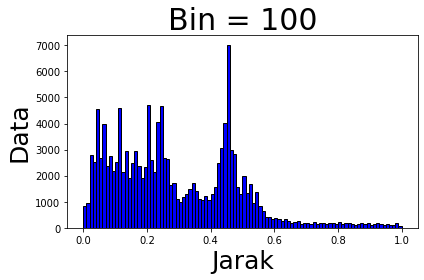

In [34]:
binwidth = 100

ax = plt.subplot(111)
ax.hist(jarak_scaled, bins = binwidth,
             color = 'blue', edgecolor = 'black')
ax.set_title('Bin = %d' % binwidth, size = 30)
ax.set_xlabel('Jarak', size = 25)
ax.set_ylabel('Data', size= 25)

plt.tight_layout()
plt.show()

In [9]:
# Find some peaks using the smoothing parameter.
fp = findpeaks(lookahead=1, interpolate=10)
# fit
results = fp.fit(jarak_scaled)
# Make plot
fp.plot()

[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8


ImportError: cv2 must be installed manually. Try to: <pip install opencv-python>

In [35]:
jarak_plot = np.linspace(-5, 10, 1000)
jarak_plot_df = pd.DataFrame(jarak_plot)

Text(-3.5, 0.31, 'Tophat Kernel Density')

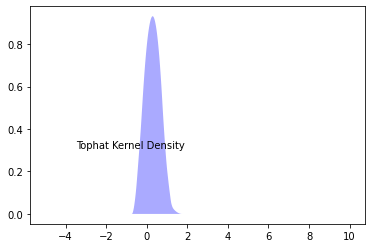

In [43]:
bins = np.linspace(-5, 10, 100)

ax_density = plt.subplot(111)
kde = KernelDensity(kernel='epanechnikov', bandwidth=0.75).fit(jarak_scaled)
log_dens = kde.score_samples(jarak_plot_df)
ax_density.fill(jarak_plot_df.iloc[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax_density.text(-3.5, 0.31, "Tophat Kernel Density")

In [ ]:
### ERROR ###

k_means_riemann = Kmeans(n_clusters=3, n_jobs=-2)
k_means_riemann.fit(data.values)
clusters_riemann = k_means_riemann.fit_predict(data.values)

In [ ]:
### SKIP ###

plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters_riemann, s=50, cmap='viridis')

centers_riemann = k_means_riemann.cluster_centers_
plt.scatter(centers_riemann[:, 1], centers_riemann[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [ ]:
### DBSCAN ###

db = DBSCAN(eps=0.3, min_samples=100).fit(data.values)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data.values, labels))